<a href="https://colab.research.google.com/github/eun-88/DataScientist_07/blob/main/arima_test_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# GitHub에 호스팅된 AirPassengers.csv 파일 주소
url = "https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv"

# 데이터 불러오기
df = pd.read_csv(url)

# 데이터 확인
print(df.head())

           ds    y
0  1949-01-01  112
1  1949-02-01  118
2  1949-03-01  132
3  1949-04-01  129
4  1949-05-01  121


In [3]:
!pip install arch==6.3.0

In [4]:
!pip install pmdarima

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


In [6]:
df = pd.read_csv(url)
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
df = df.rename(columns={'y': '#passengers'})

print(df.head())

           ds  #passengers
0  1949-01-01          112
1  1949-02-01          118
2  1949-03-01          132
3  1949-04-01          129
4  1949-05-01          121


In [8]:

df.drop('ds', axis=1, inplace=True)

In [9]:
df

,#passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


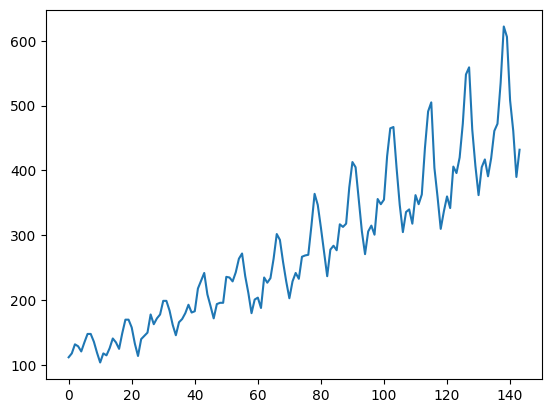

In [10]:
plt.plot(df)
plt.show()

In [11]:
df.transformed = np.log(df['#passengers'])

/tmp/ipython-input-220387072.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.transformed = np.log(df['#passengers'])


In [12]:
df.transformed

,#passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


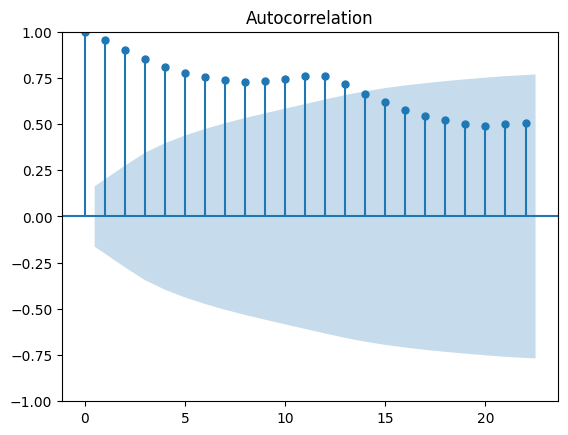

In [13]:
plot_acf(df.transformed)
plt.plot();

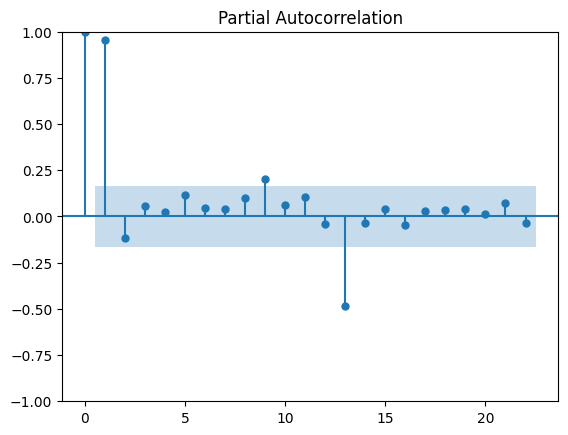

In [14]:
plot_pacf(df.transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot();

In [15]:
df_diff = df.transformed.diff()
df_diff = df_diff.dropna()

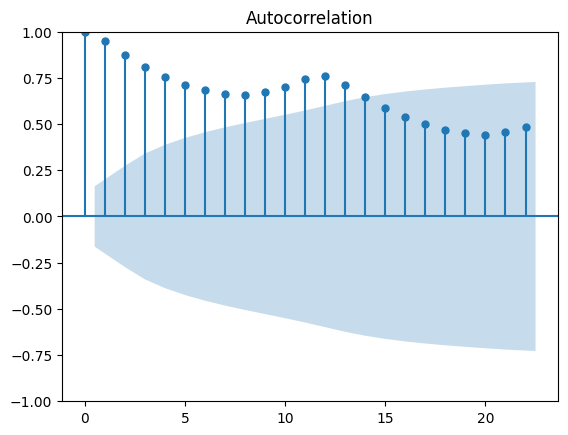

In [16]:
plot_acf(df['#passengers'])
plt.plot();

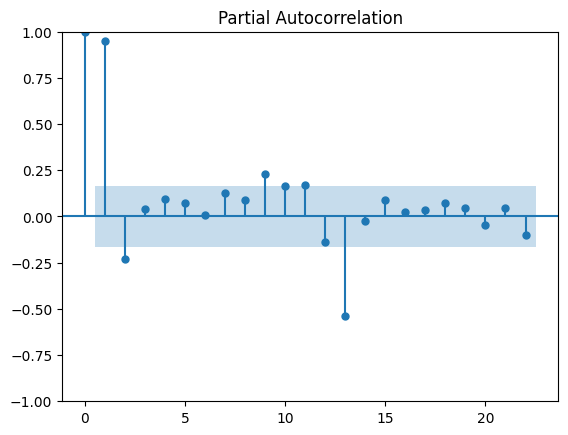

In [17]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plot_pacf(df['#passengers'])
plt.plot();

In [18]:
df.transformed

,#passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


In [19]:
train_size = int(len(df.transformed)*0.8)

df.transformed_train = df.transformed[:train_size]
df.transformed_test = df.transformed[train_size:]

/tmp/ipython-input-2844475308.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.transformed_train = df.transformed[:train_size]
/tmp/ipython-input-2844475308.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.transformed_test = df.transformed[train_size:]


In [20]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12)
res = model.fit(df.transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-212.317, Time=2.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.578, Time=2.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-219.761, Time=2.31 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=1.12 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-219.665, Time=0.89 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, Time=0

In [21]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=df.transformed_test.shape[0], return_conf_int=True)

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape)
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))
# print('--'*40)
# print(preds)
# print('--'*40)
# print(conf_int)

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>


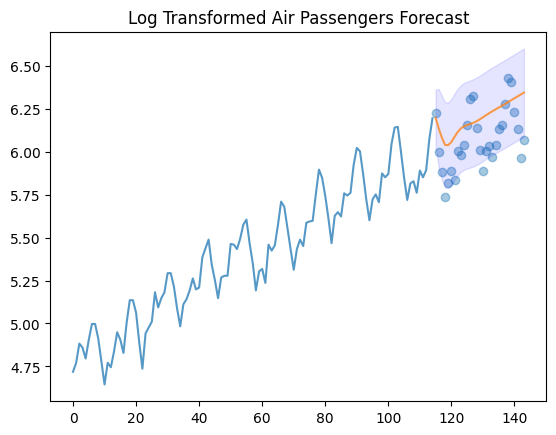

In [22]:
# 예측 성능을 시각화합니다.
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
x_axis = np.arange(df.transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:df.transformed_train.shape[0]],df.transformed_train, alpha=0.75) # 1
plt.plot(x_axis[df.transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[df.transformed_train.shape[0]:],df.transformed_test,
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

In [23]:
# 패키지 강제 업데이트 및 재설치
!pip install --upgrade numpy pandas pmdarima statsmodels

In [25]:
!pip install numpy==1.26.4 pmdarima==2.0.4
# 설치 후 다시 '런타임 재시작'을 해주세요.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.0
    Uninstalling numpy-2.4.0:
      Successfully uninstalled numpy-2.4.0
  Attempting uninstall: pmdarima
    Found existing installation: pmdarima 2.1.1
    Uninstalling pmdarima-2.1.1:
      Successfully uninstalled pmdarima-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python

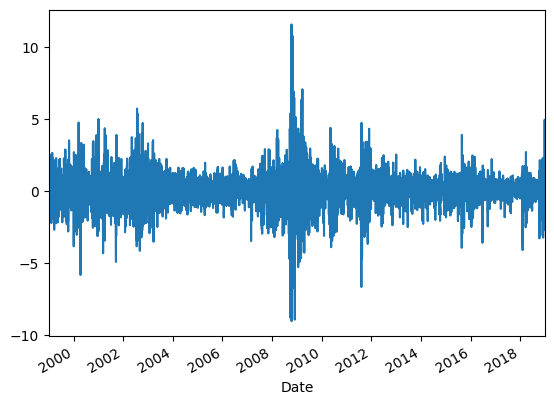

In [2]:
# ⑦-1 : 데이터 및 라이브러리 불러오기
import matplotlib.pyplot as plt
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다.
plt.show()